<a href="https://colab.research.google.com/github/ern85/Mestrado/blob/main/TestesRedesMestradoMLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
AtivaStopWords = 0
AtivaSteming = 0
EPC = 10
FuncaoAtivacao = 'sigmoid'
Otimizador = 'Adam'

In [ ]:
import pandas as pd
import numpy as np
import re
import nltk
from nltk.corpus import stopwords
nltk.download('rslp')
nltk.download('stopwords')
from nltk.stem import RSLPStemmer #Removedor de Sufixos da Língua Portuguesa

from numpy import array
from keras.preprocessing.text import one_hot
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers.core import Activation, Dropout, Dense
from keras.layers import Flatten
from keras.layers import GlobalMaxPooling1D
from keras.layers.embeddings import Embedding
from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer
from keras.layers import Embedding
from keras import backend as K
nltk.download('punkt')
import time

startTotalTime = time.time()

#opinion_reviews = pd.read_excel("/content/drive/MyDrive/Mestrado/RedeNeuralMestrado/AvalicoesAmazonFinal.xlsx")
#opinion_reviews = pd.read_excel("/content/drive/MyDrive/Mestrado/RedeNeuralMestrado/amazon_cells_labelled2colrminer.xlsx")
opinion_reviews = pd.read_excel("/content/drive/MyDrive/Mestrado/RedeNeuralMestrado/QuestionarioISP2.xlsx")


[nltk_data] Downloading package rslp to /root/nltk_data...
[nltk_data]   Package rslp is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
opinion_reviews.isnull().values.any()

False

In [ ]:
opinion_reviews.shape

(2654, 2)

In [ ]:
opinion_reviews.head()

,Opinioes,Sentimento
0,"Vamos lá, direto ao ponto: vale a pena comprar...",n
1,"Falta o suporte de filtro e clipe nasal, tem q...",n
2,"A máscara é de boa qualidade , mas não é tão c...",n
3,"produto feio sem caixa, sem nota, filtro apena...",n
4,"A máscara é de boa qualidade, confortável e nã...",p


In [ ]:
opinion_reviews["Opinioes"][3]

'produto feio sem caixa, sem nota, filtro apenas 1, e sem qualquer segurança, aberto, e apesar de não acreditar estar contaminado, um produto que supostamente feito para segurança venha sem qualquer segurança higiênicaAchei muita falta de compromisso.'

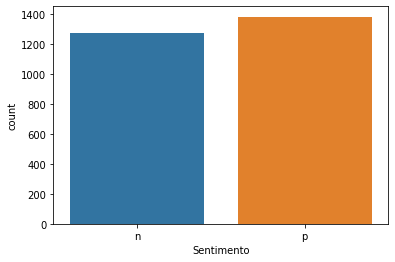

In [ ]:
import seaborn as sns

sns.countplot(x='Sentimento', data=opinion_reviews)

**Definição de parâmetros**

**Iniciando Pré-processamento**

In [ ]:
startPreProcTime = time.time()

In [ ]:
def preprocess_text(sen):
    # Removing html tags
    sentence = remove_tags(sen)

    # Remove punctuations and numbers
    sentence = re.sub('[^a-zA-Z]', ' ', sentence)

    # Single character removal
    sentence = re.sub(r"\s+[a-zA-Z]\s+", ' ', sentence)

    # Removing multiple spaces
    sentence = re.sub(r'\s+', ' ', sentence)

    return sentence

In [ ]:
#Retirar Stopwords
def RemoveStopWords(sentence):
    stopwords = nltk.corpus.stopwords.words('portuguese')
    phrase = []
    sentence = sentence.lower()
    sentence = nltk.word_tokenize(sentence)
    for word in sentence:
        if word not in stopwords:
            phrase.append(word)
        
    return ' '.join(phrase)

In [ ]:
#Teste retirada de stopwords
if AtivaStopWords == 1:
  sentences = list(opinion_reviews['Opinioes'])
  resultado_stopwords = []
  for frase in sentences:
   resultado_stopwords.append(RemoveStopWords(frase))
  print(resultado_stopwords[1])

In [ ]:
#Stemming
def Stemming(sentence):
    stemmer = RSLPStemmer()
    phrase = []
    sentence = nltk.word_tokenize(sentence)
    for word in sentence:
        phrase.append(stemmer.stem(word.lower()))
    return ' '.join(phrase)

In [ ]:
#Teste Stemming
if AtivaSteming == 1:
  if AtivaStopWords == 1:
    sentences = list(resultado_stopwords)
  else:
    sentences = list(opinion_reviews['Opinioes'])
  resultado_stem = []
  for frase in sentences:
    resultado_stem.append(Stemming(frase))
  print(resultado_stem[1])

In [ ]:
TAG_RE = re.compile(r'<[^>]+>')

def remove_tags(text):
    return TAG_RE.sub('', text)

In [ ]:
X = []
if AtivaStopWords == 1:
  sentences = list(resultado_stopwords)
elif AtivaSteming == 1:
  sentences = list(resultado_stem)
else: 
  sentences = list(opinion_reviews['Opinioes'])
for sen in sentences:
    X.append(preprocess_text(sen))

In [ ]:
X[0]

'Vamos direto ao ponto vale pena comprar esta scara Se vc precisar de uma scara para FAZER EXERC CIOS pois tem dificuldade de respirar com essas scaras de pano comuns VALE SIM pena Senti muito bem fazendo minhas corridas com ela posso atestar conforto razo vel pq com todas as outras seja descart vel ou de pano comum eu nunca consegui me exercitar direito Se vc quer uma scara para andar fazer as coisas com segurando completamente dispens vel uma gasto atoa de dinheiro Ela o fica muito bem presa ao rosto na parte de baixo Quando corre ou fala bastante ela sobe Tal problema pode ser solucionado facilmente levando uma costureira colocando um el stico na parte de baixo Isso que fiz Filtro o gaste seu dinheiro com este filtro vagabundo caro da marca Pegue coador de quina de caf fa o corte no formato coloque no lugar Sim extremamente eficiente Se o acha uma camada de pano vc pode cortar quantos coadores de caf quiser colocar no lugar do filtro Fazendo que fiz acima eu fiz teste com assoprando

In [ ]:
elapsed_time_pre = time.time() - startPreProcTime
print("Tempo de pre-processamento",elapsed_time_pre)

Tempo de pre-processamento 0.26671385765075684


In [ ]:
y = opinion_reviews['Sentimento']

y = np.array(list(map(lambda x: 1 if x=="p" else 0, y)))

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, train_size=0.70, random_state=42)

In [ ]:
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(X_train)

X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

In [ ]:
vocab_size = len(tokenizer.word_index) + 1

maxlen = 50

X_train = pad_sequences(X_train, padding='post', maxlen=maxlen)
X_test = pad_sequences(X_test, padding='post', maxlen=maxlen)


In [ ]:
from numpy import array
from numpy import asarray
from numpy import zeros
import re

embeddings_dictionary = dict()
#glove_file = open('/content/drive/MyDrive/glove_s50.txt', encoding="utf8")
glove_file = open('/content/drive/MyDrive/glove.6B.50d.txt', encoding="utf8")
for i, line in enumerate(glove_file):
    try:
      line = line.strip()
      if line == "":
        continue
      line = line.replace(",",".")
      records = line.split()
      word = records[0]
      vector_dimensions = asarray(records[1:], dtype='float32')
      embeddings_dictionary [word] = vector_dimensions
    except:
      print (i)
glove_file.close()

In [ ]:
embedding_matrix = zeros((vocab_size, 50))
for word, index in tokenizer.word_index.items():
    embedding_vector = embeddings_dictionary.get(word)
    if embedding_vector is not None:
        embedding_matrix[index] = embedding_vector

In [ ]:
def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

In [ ]:
model = Sequential()
embedding_layer = Embedding(vocab_size, 50, weights=[embedding_matrix], input_length=maxlen , trainable=False)
model.add(embedding_layer)

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
#model.add(Dense(128, activation=FuncaoAtivacao))
#model.add(Dropout(0.5))
model.add(Dense(1, activation=FuncaoAtivacao))


In [ ]:
model.compile(optimizer=Otimizador, loss='binary_crossentropy', metrics=['acc', f1_m, precision_m, recall_m])

print(model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 50, 50)            203900    
                                                                 
 flatten_1 (Flatten)         (None, 2500)              0         
                                                                 
 dense_1 (Dense)             (None, 128)               320128    
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 1)                 129       
                                                                 
Total params: 524,157
Trainable params: 320,257
Non-trainable params: 203,900
_________________________________________________________________
None


In [ ]:
start_time = time.time()
history = model.fit(X_train, y_train, batch_size=128, epochs=EPC, verbose=1, validation_split=0.3)
elapsed_time = time.time() - start_time
print ("processing time:", elapsed_time, "seconds")

score = model.evaluate(X_test, y_test, verbose=1)

Epoch 1/10
11/11 [==============================] - 1s 37ms/step - loss: 0.6756 - acc: 0.5920 - f1_m: 0.5937 - precision_m: 0.6076 - recall_m: 0.5899 - val_loss: 0.6558 - val_acc: 0.6774 - val_f1_m: 0.6425 - val_precision_m: 0.8101 - val_recall_m: 0.5353
Epoch 2/10
11/11 [==============================] - 0s 10ms/step - loss: 0.5057 - acc: 0.7737 - f1_m: 0.7670 - precision_m: 0.8245 - recall_m: 0.7212 - val_loss: 0.6018 - val_acc: 0.6953 - val_f1_m: 0.6971 - val_precision_m: 0.7518 - val_recall_m: 0.6517
Epoch 3/10
11/11 [==============================] - 0s 10ms/step - loss: 0.4379 - acc: 0.8168 - f1_m: 0.8151 - precision_m: 0.7902 - recall_m: 0.8427 - val_loss: 0.6247 - val_acc: 0.7133 - val_f1_m: 0.7030 - val_precision_m: 0.7895 - val_recall_m: 0.6346
Epoch 4/10
11/11 [==============================] - 0s 11ms/step - loss: 0.3771 - acc: 0.8507 - f1_m: 0.8548 - precision_m: 0.8579 - recall_m: 0.8572 - val_loss: 0.6043 - val_acc: 0.7133 - val_f1_m: 0.7069 - val_precision_m: 0.7821 - v

In [ ]:
elapsedTotalTime = time.time() - startTotalTime

In [ ]:
print("Test Score:", score[0])
print("Test Accuracy:", score[1])

Test Score: 0.5989087820053101
Test Accuracy: 0.7465495467185974


In [ ]:
loss, accuracy, f1_score, precision, recall = model.evaluate(X_test, y_test, verbose=0)
print("Loss:", round(loss,8))
print("Accuracy:", round(accuracy,8))
print("Precision:", round(precision,8))
print("Recall", round(recall,8))
print("F1_Score:", round(f1_score,8))
print("Tempo de processamento da rede:", str(elapsed_time).replace(".", ","))
print("Tempo de pre-processamento:",str(elapsed_time_pre).replace(".", ","))
print("Tempo total:", str(elapsedTotalTime).replace(".", ","))


Loss: 0.59890878
Accuracy: 0.74654955
Precision: 0.80284989
Recall 0.69164771
F1_Score: 0.73474258
Tempo de processamento da rede: 2,7220022678375244
Tempo de pre-processamento: 0,26671385765075684
Tempo total: 64,33106756210327


In [ ]:
from tabulate import tabulate

table = [
         [str(loss).replace(".",",")],
         [str(accuracy).replace(".",",")],
         [str(precision).replace(".",",")],
         [str(recall).replace(".",",")],
         [str(f1_score).replace(".",",")],
         [str(elapsed_time).replace(".", ",")],
         [str(elapsed_time_pre).replace(".", ",")],
         [str(elapsedTotalTime).replace(".", ",")]
]

print(tabulate(table))

-------------------
0,5989087820053101
0,7465495467185974
0,8028498888015747
0,6916477084159851
0,7347425818443298
2,7220022678375244
0,26671385765075684
64,33106756210327
-------------------


In [ ]:
model.predict(X_test[0].reshape((1,50)))

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Acurácia do modelo')
plt.ylabel('acurácia')
plt.xlabel('época')
plt.legend(['treino','teste'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('Perda do modelo')
plt.ylabel('perda')
plt.xlabel('época')
plt.legend(['treino','teste'], loc='upper left')
plt.show()

plt.plot(history.history['f1_m'])
plt.plot(history.history['val_f1_m'])

#plt.title('f1_score do modelo')
plt.ylabel('f1_score')
plt.xlabel('época')
plt.legend(['treino','teste'], loc='upper left')
plt.show()

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

confusion_matrix(y_test, np.round(model.predict(X_test)))

In [ ]:
confusion_matrix(y_train, np.round(model.predict(X_train)))